# Implementación del algoritmo KNN 

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10,6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [151]:
df = pd.read_csv('data_final.txt', sep='\t')
df.head()

,name,spect_b,0.45,0.452002002002002,0.45400400400400404,0.456006006006006,0.458008008008008,0.46001001001001,0.46201201201201203,0.46401401401401404,...,2.431981981981982,2.433983983983984,2.4359859859859863,2.437987987987988,2.43998998998999,2.441991991991992,2.443993993993994,2.4459959959959963,2.447997997997998,2.45
0,Abehiroshi,V,0.9765,0.873727,0.802019,0.908693,0.992507,0.892887,0.806158,0.822114,...,1.453882,1.428696,1.286868,1.095002,0.999979,1.100082,1.281601,1.382604,1.370983,1.3453
1,Senrikyu,B,1.1423,1.104633,1.062175,0.996224,0.949799,1.010879,1.060699,1.024171,...,0.991043,0.997508,1.001280,1.001278,1.000005,0.999570,0.999831,1.000092,1.000091,1.0000
2,Robinson,Sr,0.8445,0.770504,0.786651,0.801385,0.780085,0.812111,0.815159,0.828218,...,1.696828,1.687543,1.699685,1.727674,1.741618,1.724284,1.714307,1.760465,1.817740,1.7467
3,Paris,T,0.9238,0.935045,0.928104,0.933731,0.943692,0.937315,0.953128,0.967190,...,2.056997,1.990262,1.979909,2.040457,1.958246,1.594457,1.155880,0.926450,0.944271,1.0000
4,Farinella,D,0.8795,0.953828,0.956625,0.849646,0.784283,0.867913,0.938608,0.909334,...,1.482280,1.065135,1.077220,1.503595,1.945946,2.089067,2.025298,1.945494,1.926199,1.9289


In [282]:
# Mezclar el dtaset de forma aleatoria
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,name,spect_b,0.45,0.452002002002002,0.45400400400400404,0.456006006006006,0.458008008008008,0.46001001001001,0.46201201201201203,0.46401401401401404,...,2.431981981981982,2.433983983983984,2.4359859859859863,2.437987987987988,2.43998998998999,2.441991991991992,2.443993993993994,2.4459959959959963,2.447997997997998,2.45
0,Una,C,0.9554,0.952206,0.957080,0.963426,0.963682,0.958261,0.950891,0.952370,...,1.137844,1.018644,1.023530,1.148583,1.268830,1.289394,1.259743,1.262516,1.299798,1.2926
1,Pandora,X,0.9385,0.948918,0.951001,0.952472,0.955904,0.953284,0.950802,0.948764,...,1.507537,1.508404,1.506992,1.504487,1.504190,1.508001,1.511744,1.509981,1.503708,1.5004
2,Lydia,X,0.9536,0.956926,0.948856,0.940097,0.939956,0.950454,0.957656,0.955274,...,1.509242,1.509756,1.507680,1.504256,1.501806,1.502057,1.504142,1.506479,1.506271,1.4995
3,Hecuba,Sl,0.7934,0.787520,0.793797,0.794695,0.793040,0.812129,0.839861,0.862730,...,1.476426,1.475273,1.477298,1.482651,1.487484,1.488963,1.489107,1.490988,1.493474,1.4912
4,Nemesis,C,0.9451,0.931020,0.924020,0.960456,0.997359,0.968811,0.940315,0.936732,...,1.275044,1.264661,1.263843,1.273667,1.283173,1.283848,1.279323,1.276147,1.277067,1.2810


Se observa que el dataset está muy desbalanceado:

<AxesSubplot:xlabel='spect_b', ylabel='count'>

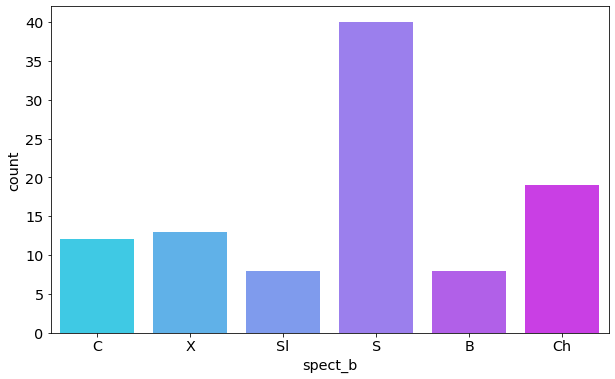

In [283]:
sns.countplot(x='spect_b', data=df, palette='cool')

Se eligen las 4 clases principales: **S,  h,  X,  C**  y quedan 100 asteroides:

In [284]:
df = df[(df.spect_b == 'S') | (df.spect_b == 'Ch') | (df.spect_b == 'X') | (df.spect_b == 'C') | (df.spect_b == 'Sl') | (df.spect_b == 'B') ]
df.shape

(100, 1002)

<AxesSubplot:xlabel='spect_b', ylabel='count'>

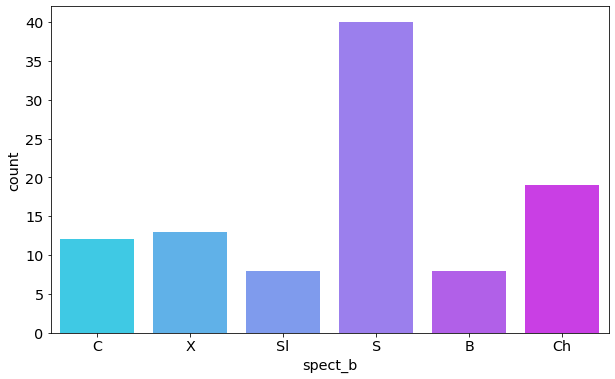

In [285]:
sns.countplot(x='spect_b', data=df, palette='cool')

Se divide en características (intensidad en cada longitud de onda) y labels (tipo espectral): 

In [286]:
X_data = df[df.columns[2:]]
y_data = df.spect_b # label

X_data.head()

,0.45,0.452002002002002,0.45400400400400404,0.456006006006006,0.458008008008008,0.46001001001001,0.46201201201201203,0.46401401401401404,0.46601601601601605,0.468018018018018,...,2.431981981981982,2.433983983983984,2.4359859859859863,2.437987987987988,2.43998998998999,2.441991991991992,2.443993993993994,2.4459959959959963,2.447997997997998,2.45
0,0.9554,0.952206,0.957080,0.963426,0.963682,0.958261,0.950891,0.952370,0.956709,0.965352,...,1.137844,1.018644,1.023530,1.148583,1.268830,1.289394,1.259743,1.262516,1.299798,1.2926
1,0.9385,0.948918,0.951001,0.952472,0.955904,0.953284,0.950802,0.948764,0.947862,0.954653,...,1.507537,1.508404,1.506992,1.504487,1.504190,1.508001,1.511744,1.509981,1.503708,1.5004
2,0.9536,0.956926,0.948856,0.940097,0.939956,0.950454,0.957656,0.955274,0.955100,0.959329,...,1.509242,1.509756,1.507680,1.504256,1.501806,1.502057,1.504142,1.506479,1.506271,1.4995
3,0.7934,0.787520,0.793797,0.794695,0.793040,0.812129,0.839861,0.862730,0.866623,0.855692,...,1.476426,1.475273,1.477298,1.482651,1.487484,1.488963,1.489107,1.490988,1.493474,1.4912
4,0.9451,0.931020,0.924020,0.960456,0.997359,0.968811,0.940315,0.936732,0.941314,0.953809,...,1.275044,1.264661,1.263843,1.273667,1.283173,1.283848,1.279323,1.276147,1.277067,1.2810


In [287]:
y_data.unique()

array(['C', 'X', 'Sl', 'S', 'B', 'Ch'], dtype=object)

La longitud de onda máxima a la cual se considera rango visible es a los $0.730 \mu m$.

In [288]:
print(X_data.columns[142])
X_visible = X_data[X_data.columns[:142]]
print('Shape dataframe espectro visible',X_visible.shape)

0.7342842842842843
Shape dataframe espectro visible (100, 142)


In [289]:
X_nir = X_data[X_data.columns[142:]]
print('Shape dataframe espectro infrarrojo cercano',X_nir.shape)

Shape dataframe espectro infrarrojo cercano (100, 858)


## Resultados con el dataframe del espectro **Visible**

In [290]:
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_visible, y_data, test_size=0.3, random_state=1)
X_train_vis.shape, X_test_vis.shape, y_train_vis.shape, y_test_vis.shape

((70, 142), (30, 142), (70,), (30,))

In [291]:
y_test_vis.values

array(['Ch', 'S', 'Sl', 'C', 'B', 'C', 'X', 'B', 'S', 'C', 'Ch', 'C', 'S',
       'S', 'S', 'S', 'Ch', 'Ch', 'X', 'Sl', 'X', 'S', 'Ch', 'B', 'S',
       'X', 'Ch', 'Sl', 'S', 'C'], dtype=object)

<AxesSubplot:ylabel='count'>

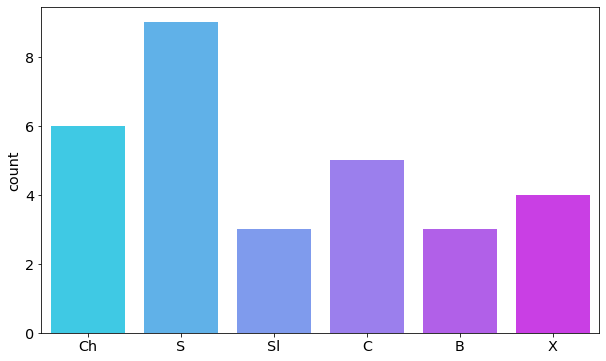

In [292]:
sns.countplot(x=y_test_vis.values, palette='cool')

#### Entrenamiento y GridSearch: Búsqueda de mejores hiperparámetros

In [293]:
def graph_neighbors(X_train, y_train, X_test, y_test):
    
    training_accuracy = []
    test_accuracy = []

    # try n_neighbors from 1 to 10
    neighbors_settings = range(1, 20)

    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)
        # record training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
        # record generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
    plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("n_neighbors")
    plt.grid()
    plt.legend()

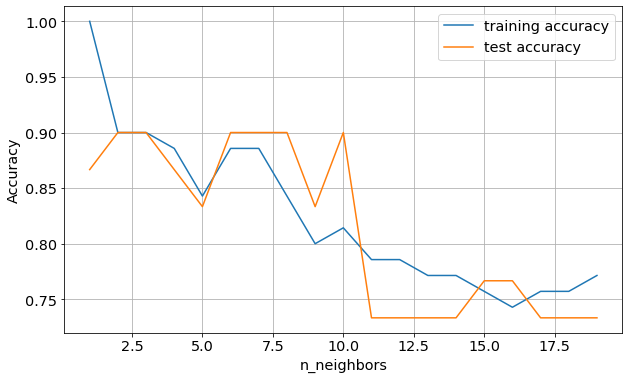

In [294]:
graph_neighbors(X_train_vis, y_train_vis, X_test_vis, y_test_vis)

In [295]:
def model(X_train, y_train):
    
    knn = KNeighborsClassifier()  
    
    param_grid = dict(n_neighbors=list(range(1, 20)), 
                      weights=['uniform', 'distance'],
                      algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'])

    grid = GridSearchCV(knn, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    best_param = grid.best_params_
    
    print('Mejores hiperparámetros',grid.best_params_)
    print('Mejor score',grid.best_score_)
    
    return best_param

In [296]:
best_param_vis = model(X_train_vis, y_train_vis)

Mejores hiperparámetros {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}
Mejor score 0.8428571428571429


### Modelo final con espectro visible

In [311]:
def train_test_model(X_train, y_train, X_test, y_test, y_data, best_param):
    
    clf = KNeighborsClassifier(**best_param)
    clf.fit(X_train, y_train)

    p = clf.predict(X_test)
    
    #Importe el módulo de métricas de sklearn para medir el desempeño (accuracy_score) de su modelo.
    print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
    print("Test set Accuracy: ", metrics.accuracy_score(y_test, p))
    
    # Matrix de confusión
    mat = confusion_matrix(y_test, p)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues",
               xticklabels=['B', 'C', 'Ch', 'S', 'Sl', 'X'],
               yticklabels=['B', 'C', 'Ch', 'S', 'Sl', 'X'])
    plt.title('Matriz de confusión')
    plt.xlabel('Categoría real')
    plt.ylabel('Categoría Predicha')
    print(classification_report(y_test, p))
    
    
    #train model with cv of 5 
    cv_scores = cross_val_score(clf, X_test , y_test, cv=5)
    #print each cv score (accuracy) and average them
    print(cv_scores)
    print('cv_scores mean:{}'.format(np.mean(cv_scores)))
    
    # Show first two principal components without scaler
    pca = PCA()
    plt.figure(figsize=(8,6))
    Xt = pca.fit_transform(X_test)
    plot = plt.scatter(Xt[:,0], Xt[:,1], c=y_test.astype("category").cat.codes)
    plt.legend(handles=plot.legend_elements()[0], labels=['B', 'C', 'Ch', 'S', 'Sl', 'X'])
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Primeros dos componenetes principales")
    plt.grid()
    plt.show()
    
    return p

Train set Accuracy:  0.9
Test set Accuracy:  0.9
              precision    recall  f1-score   support

           B       1.00      1.00      1.00         3
           C       1.00      1.00      1.00         5
          Ch       1.00      1.00      1.00         6
           S       0.80      0.89      0.84         9
          Sl       0.67      0.67      0.67         3
           X       1.00      0.75      0.86         4

    accuracy                           0.90        30
   macro avg       0.91      0.88      0.89        30
weighted avg       0.91      0.90      0.90        30

[0.66666667 0.83333333 0.66666667 1.         1.        ]
cv_scores mean:0.8333333333333333


/Users/daniandreacosmo/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


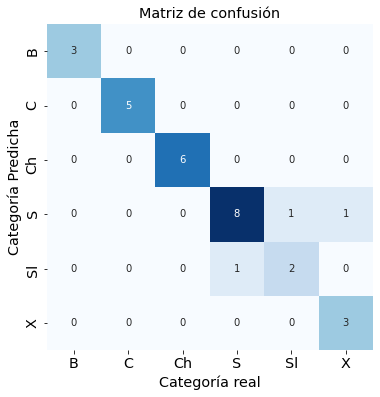

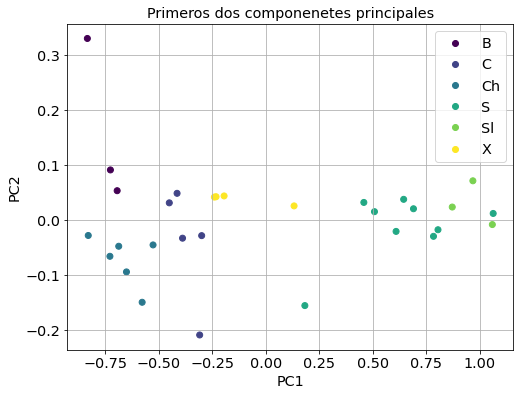

In [312]:
pred_vis = train_test_model(X_train_vis, 
                            y_train_vis, 
                            X_test_vis, 
                            y_test_vis, 
                            y_data, 
                            best_param_vis)

In [313]:
compa = pd.DataFrame({'y_test': y_test_vis.values, 'p': pred_vis})
compa

,y_test,p
0,Ch,Ch
1,S,S
2,Sl,S
3,C,C
4,B,B
5,C,C
6,X,X
7,B,B
8,S,Sl
9,C,C


## Resultados con el dataframe del espectro **Infrarrojo Cercano**

In [322]:
X_train_nir, X_test_nir, y_train_nir, y_test_nir = train_test_split(X_nir, y_data, test_size=0.3, random_state=1)
X_train_nir.shape, X_test_nir.shape, y_train_nir.shape, y_test_nir.shape

((70, 858), (30, 858), (70,), (30,))

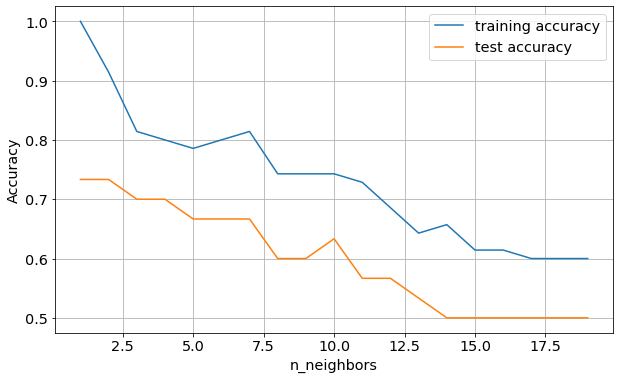

In [323]:
graph_neighbors(X_train_nir, y_train_nir, X_test_nir, y_test_nir)

In [324]:
best_param_nir = model(X_train_nir, y_train_nir)

Mejores hiperparámetros {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
Mejor score 0.7714285714285715


Train set Accuracy:  1.0
Test set Accuracy:  0.7333333333333333
              precision    recall  f1-score   support

           B       0.50      0.67      0.57         3
           C       1.00      0.20      0.33         5
          Ch       0.50      0.83      0.62         6
           S       1.00      0.89      0.94         9
          Sl       0.75      1.00      0.86         3
           X       1.00      0.75      0.86         4

    accuracy                           0.73        30
   macro avg       0.79      0.72      0.70        30
weighted avg       0.82      0.73      0.72        30

[0.5        0.5        0.66666667 0.5        0.66666667]
cv_scores mean:0.5666666666666667


/Users/daniandreacosmo/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


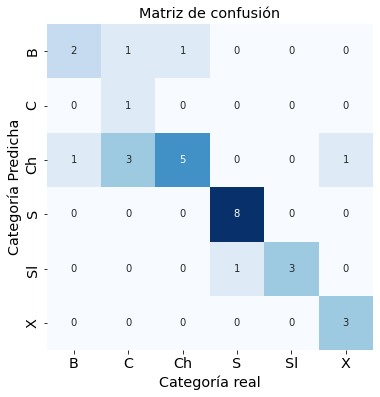

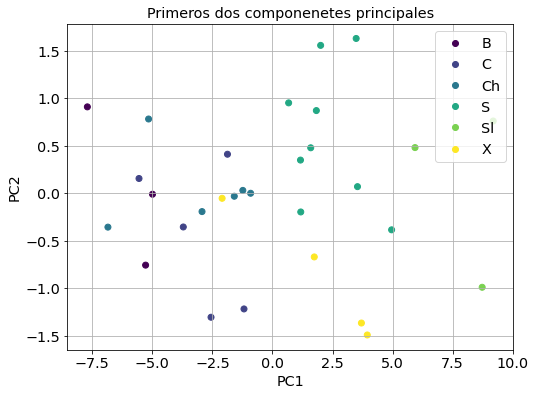

In [325]:
pred_nir = train_test_model(X_train_nir, 
                            y_train_nir, 
                            X_test_nir, 
                            y_test_nir, 
                            y_data, 
                            best_param_nir)